In [1]:
!pip install yfinance

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get the data
btc= yf.Ticker("BTC-USD")
df = btc.history(period="max")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [3]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-07 00:00:00+00:00,22757.267578,23310.974609,22756.257812,23264.291016,27187964471,0.0,0.0
2023-02-08 00:00:00+00:00,23263.416016,23367.958984,22731.097656,22939.398438,25371367758,0.0,0.0
2023-02-09 00:00:00+00:00,22946.566406,22996.437500,21773.974609,21819.039062,32572572185,0.0,0.0
2023-02-10 00:00:00+00:00,21819.005859,21941.185547,21539.392578,21651.183594,27078406594,0.0,0.0
2023-02-11 00:00:00+00:00,21649.437500,21767.455078,21627.693359,21731.269531,21406218240,0.0,0.0


In [4]:
df.shape

(3070, 7)

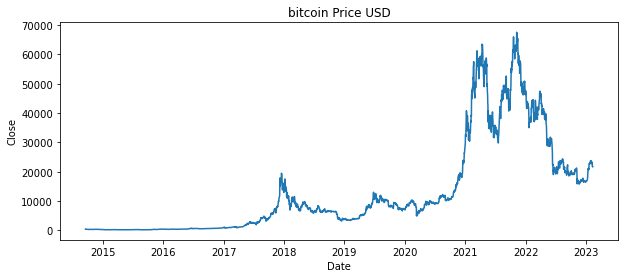

In [5]:
df.dropna()
plt.figure(figsize=(10, 4))
plt.title("bitcoin Price USD")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(df["Close"])
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3070 entries, 2014-09-17 00:00:00+00:00 to 2023-02-11 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3070 non-null   float64
 1   High          3070 non-null   float64
 2   Low           3070 non-null   float64
 3   Close         3070 non-null   float64
 4   Volume        3070 non-null   int64  
 5   Dividends     3070 non-null   float64
 6   Stock Splits  3070 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 191.9 KB


In [8]:
df.isna()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,False,False,False,False,False,False,False
2014-09-18 00:00:00+00:00,False,False,False,False,False,False,False
2014-09-19 00:00:00+00:00,False,False,False,False,False,False,False
2014-09-20 00:00:00+00:00,False,False,False,False,False,False,False
2014-09-21 00:00:00+00:00,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2023-02-07 00:00:00+00:00,False,False,False,False,False,False,False
2023-02-08 00:00:00+00:00,False,False,False,False,False,False,False
2023-02-09 00:00:00+00:00,False,False,False,False,False,False,False


In [9]:
#to get the count of null values in each column
df.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [10]:
#to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3070.000000,3070.000000,3070.000000,3070.000000,3.070000e+03,3070.0,3070.0
mean,12967.101158,13291.900477,12606.132925,12972.490645,1.643603e+10,0.0,0.0
std,16108.558124,16519.659342,15633.844757,16104.241528,1.987167e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,697.726501,706.445496,679.657501,701.194992,1.068630e+08,0.0,0.0
50%,7220.737305,7387.750000,7061.411133,7228.891602,7.816003e+09,0.0,0.0
75%,17186.712402,17710.600098,16902.428223,17203.966797,2.787871e+10,0.0,0.0
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.0,0.0


In [12]:
#Splitting the dataset
X = df.drop( ['Close'], axis = 1)
Y = df['Close']

In [13]:
#Splitting the data as the trainning & testing as 70-30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)
mse_knr=metrics.mean_squared_error(y_test,y_pred_knr)
print(mse_knr)
r2knr = metrics.r2_score(y_test, y_pred_knr)
print(r2knr)

158263504.5749523
0.4052924624045069


In [18]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
mse_rf=metrics.mean_squared_error(y_test,y_pred_rf)
print(mse_rf)
r2rf = metrics.r2_score(y_test, y_pred_rf)
print(r2rf)

194630.93071996028
0.9992686344090557


In [19]:
dt = tree.DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt=metrics.mean_squared_error(y_test,y_pred_dt)
print(mse_dt)
r2dt = metrics.r2_score(y_test, y_pred_dt)
print(r2dt)

309346.69396609697
0.9988375664299487


In [20]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
Y_pred_gbr = gbr.predict(X_test)
mse_gbr=metrics.mean_squared_error(y_test,Y_pred_gbr)
print(mse_gbr)
r2gbr = metrics.r2_score(y_test, Y_pred_gbr)
print(r2gbr)

215262.48514969402
0.9991911071170585


In [21]:
print("*"*10, "R2 score", "*"*10)

print("-"*30)
print("K nearest neighbors: ", r2knr)
print("K nearest neighbors: ",mse_knr)
print("-"*30)


print("-"*30)
print("random forest: ", r2rf)
print("random forest: ",mse_rf)
print("-"*30)


print("-"*30)
print("decision tree: ", r2dt)
print("decision tree: ",mse_dt)
print("-"*30)


print("-"*30)
print("gradient boosting: ", r2gbr)
print("gradient boosting: ",mse_gbr)
print("-"*30)

********** R2 score **********
------------------------------
K nearest neighbors:  0.4052924624045069
K nearest neighbors:  158263504.5749523
------------------------------
------------------------------
random forest:  0.9992686344090557
random forest:  194630.93071996028
------------------------------
------------------------------
decision tree:  0.9988375664299487
decision tree:  309346.69396609697
------------------------------
------------------------------
gradient boosting:  0.9991911071170585
gradient boosting:  215262.48514969402
------------------------------


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [23]:
df['Price'] = df['Close']

In [24]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Price
Date,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,457.334015
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,424.440002
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,394.795990
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,408.903992
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,398.821014
...,...,...,...,...,...,...,...,...
2023-02-07 00:00:00+00:00,22757.267578,23310.974609,22756.257812,23264.291016,27187964471,0.0,0.0,23264.291016
2023-02-08 00:00:00+00:00,23263.416016,23367.958984,22731.097656,22939.398438,25371367758,0.0,0.0,22939.398438
2023-02-09 00:00:00+00:00,22946.566406,22996.437500,21773.974609,21819.039062,32572572185,0.0,0.0,21819.039062


In [25]:
# Add the year, month, and day columns to the dataframe
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

In [26]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Price,Year,Month,Day
Date,,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,457.334015,2014,9,17
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,424.440002,2014,9,18
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,394.795990,2014,9,19
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,408.903992,2014,9,20
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,398.821014,2014,9,21
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-07 00:00:00+00:00,22757.267578,23310.974609,22756.257812,23264.291016,27187964471,0.0,0.0,23264.291016,2023,2,7
2023-02-08 00:00:00+00:00,23263.416016,23367.958984,22731.097656,22939.398438,25371367758,0.0,0.0,22939.398438,2023,2,8
2023-02-09 00:00:00+00:00,22946.566406,22996.437500,21773.974609,21819.039062,32572572185,0.0,0.0,21819.039062,2023,2,9


In [31]:
# Split the data into a training set and a testing set
x_train, x_test, y_train,y_test = train_test_split(df.drop('Price', axis=1), df['Price'], test_size=0.2)

In [32]:
# Train a linear regression model on the training data
model = RandomForestRegressor()
model.fit(x_train[['Year', 'Month', 'Day']], y_train)
# Evaluate the model on the testing data
print(f"Accuracy: {model.score(x_test[['Year', 'Month', 'Day']], y_test)}")
# Use the trained model to make predictions about future prices
future_prices = model.predict(np.array([[2024, 2, 5]]))
print(f"Predicted price: {future_prices[0]}")

Accuracy: 0.9983957062929304
Predicted price: 23057.15685546875
